# Understanding Descriptive Statistics

Import the necessary libraries here:

In [199]:
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

## Challenge 1
#### 1.- Define a function that simulates rolling a dice 10 times. Save the information in a dataframe.
**Hint**: you can use the *choices* function from module *random* to help you with the simulation.

In [26]:
def roll_dice(num_dice):
    """Return a list of integers with length `num_dice`.

    Each integer in the returned list is a random number between
    1 and 6, inclusive.
    """
    roll_results = []
    for _ in range(num_dice):
        roll = random.randint(1, 6)
        roll_results.append(roll)
    return roll_results


In [27]:
df = roll_dice(10)
df
print(type(df))

<class 'list'>


In [28]:
df = pd.DataFrame(df)
df

,0
0,3
1,3
2,5
3,5
4,6
5,5
6,3
7,2
8,5
9,4


In [29]:
df1 = df.rename({0:'value'}, axis = 1)
df1

,value
0,3
1,3
2,5
3,5
4,6
5,5
6,3
7,2
8,5
9,4


In [30]:
df2 = df.sort_values(by=0)
df2

,0
7,2
0,3
1,3
6,3
9,4
2,5
3,5
5,5
8,5
4,6


#### 2.- Plot the results sorted by value.

<AxesSubplot:>

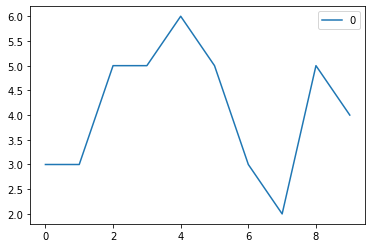

In [31]:
df.plot()

#### 3.- Calculate the frequency distribution and plot it. What is the relation between this plot and the plot above? Describe it with words.

In [32]:
df1['freq_count'] = df1.groupby('value')['value'].transform('count')
df1

,value,freq_count
0,3,3
1,3,3
2,5,4
3,5,4
4,6,1
5,5,4
6,3,3
7,2,1
8,5,4
9,4,1


In [33]:
df3 = df1.groupby('value').count()
df4 = df3.reset_index()
df4

,value,freq_count
0,2,1
1,3,3
2,4,1
3,5,4
4,6,1


ValueError: The 'color' keyword argument must have one color per dataset, but 2 datasets and 1 colors were provided

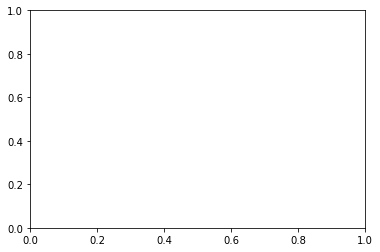

In [39]:
x1 = df1

kwargs = dict(alpha=0.5, bins=10)

plt.hist(df1, **kwargs, color='g')
plt.gca().set(title='Tiradas', ylabel='Frequency')
plt.xlim(1,6)


# """
your comments here
"""

## Challenge 2
Now, using the dice results obtained in *challenge 1*, your are going to define some functions that will help you calculate the mean of your data in two different ways, the median and the four quartiles. 

#### 1.- Define a function that computes the mean by summing all the observations and dividing by the total number of observations. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [77]:
def mean(v):
    x= sum(v)/len(v)
    return x

#### 2.- First, calculate the frequency distribution. Then, calculate the mean using the values of the frequency distribution you've just computed. You are not allowed to use any methods or functions that directly calculate the mean value. 

df_3=df.iloc[:].value_counts()
df_3

In [81]:
df5 = df4['freq_count']
df5


0    1
1    3
2    1
3    4
4    1
Name: freq_count, dtype: int64

In [82]:
#mean2 = list(df5)


In [83]:
mean(mean2)

2.0

#### 3.- Define a function to calculate the median. You are not allowed to use any methods or functions that directly calculate the median value. 
**Hint**: you might need to define two computation cases depending on the number of observations used to calculate the median.

In [84]:
def median(v):
    v.sort()
    if len(v)%2 != 0:
        median = v[int(len(v)/2)]
    else: 
        median = v[(int(len(v)/2))-1]+ v[int(len(v)/2)]
    return median

#### 4.- Define a function to calculate the four quartiles. You can use the function you defined above to compute the median but you are not allowed to use any methods or functions that directly calculate the quartiles. 

In [86]:
df4.describe()

,value,freq_count
count,5.000000,5.000000
mean,4.000000,2.000000
std,1.581139,1.414214
min,2.000000,1.000000
25%,3.000000,1.000000
50%,4.000000,1.000000
75%,5.000000,3.000000
max,6.000000,4.000000


# Challenge 3

Read the csv roll_the_dice_hundred.csv from the data folder.

1.- Sort the values and plot them. What do you see?

In [89]:
df_roll = pd.read_csv('../data/roll_the_dice_hundred.csv')
df_roll.head()

,Unnamed: 0,roll,value
0,0,0,1
1,1,1,2
2,2,2,6
3,3,3,1
4,4,4,6


In [99]:
df_roll_1 = df_roll.sort_values(by='value').reset_index(drop=True)
df_roll_1

,Unnamed: 0,roll,value
0,0,0,1
1,47,47,1
2,56,56,1
3,9,9,1
4,73,73,1
...,...,...,...
95,17,17,6
96,11,11,6
97,24,24,6
98,21,21,6


<AxesSubplot:xlabel='value', ylabel='count'>

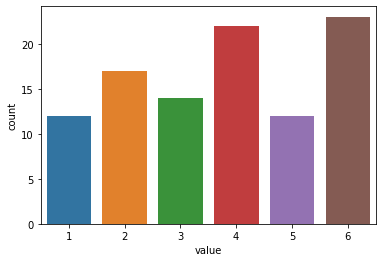

In [101]:
sns.countplot(x ="value", data = df_roll_1)

In [102]:
"""
La cara del dado que más se repite es el 6
"""

'\nLa cara del dado que más se repite es el 6\n'

#### 2.- Using the functions you defined in *challenge 2*, calculate the mean value of the hundred dice rolls.

In [113]:
df_roll_2 = df_roll_1['value']
mean_roll = list(df_roll_2)
mean(mean_roll)


3.74

In [104]:
median(mean_roll)

8

#### 3.- Now, calculate the frequency distribution.


In [111]:
df_roll_1['freq_count'] = df_roll_1.groupby('value')['value'].transform('count')
df_roll_3 = df_roll_1.groupby(['value']).count()
df_roll_4 = df_roll_3.reset_index()
df_roll_4

,value,Unnamed: 0,roll,freq_count
0,1,12,12,12
1,2,17,17,17
2,3,14,14,14
3,4,22,22,22
4,5,12,12,12
5,6,23,23,23


#### 4.- Plot the histogram. What do you see (shape, values...) ? How can you connect the mean value to the histogram? 

<class 'tuple'>


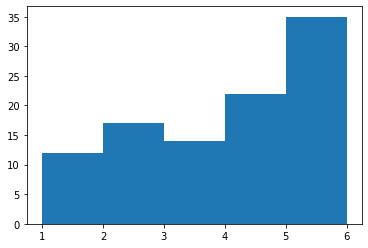

In [122]:

df_plot = df_roll['value']
x = plt.hist(df_plot, bins = 5)
x
print(type(x))

In [ ]:
"""
A través del gráfico, no podemos intuir la media.
"""

#### 5.- Read the `roll_the_dice_thousand.csv` from the `data` folder. Plot the frequency distribution as you did before. Has anything changed? Why do you think it changed?

In [126]:
df_t = pd.read_csv('../data/roll_the_dice_thousand.csv')
df_t.head()

,Unnamed: 0,roll,value
0,0,0,5
1,1,1,6
2,2,2,1
3,3,3,6
4,4,4,5


In [133]:
df_study=df_t.sort_values(by='value').reset_index(drop=True)
df_study.head()

,Unnamed: 0,roll,value
0,564,564,1
1,922,922,1
2,560,560,1
3,213,213,1
4,214,214,1


<AxesSubplot:xlabel='value', ylabel='count'>

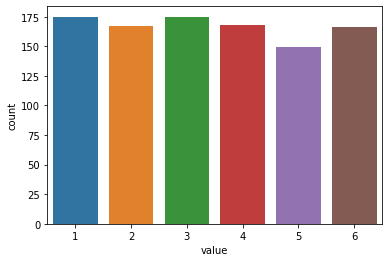

In [134]:
sns.countplot(x ="value", data = df_study)

In [135]:
"""
Si ha cambiado porque ahora las caras de los dados que más se repiten son el 1 y el 3. Saliendo los dos 175 veces.
"""

'\nSi ha cambiado porque ahora las caras de los dados que más se repiten son el 1 y el 3. Saliendo los dos 175 veces.\n'

## Challenge 4
In the `data` folder of this repository you will find three different files with the prefix `ages_population`. These files contain information about a poll answered by a thousand people regarding their age. Each file corresponds to the poll answers in different neighbourhoods of Barcelona.

#### 1.- Read the file `ages_population.csv`. Calculate the frequency distribution and plot it as we did during the lesson. Try to guess the range in which the mean and the standard deviation will be by looking at the plot. 

In [138]:
df_population = pd.read_csv('../data/ages_population.csv')
df_population.head()

,observation
0,68.0
1,12.0
2,45.0
3,38.0
4,49.0


In [143]:
df_population['freq_count'] = df_population.groupby('observation')['observation'].transform('count')
df_population.head()

,observation,freq_count
0,68.0,3
1,12.0,11
2,45.0,29
3,38.0,30
4,49.0,19


In [151]:
df_population1 = df_population.value_counts(sort=False)
df_population1

observation  freq_count
1.0          2             2
2.0          2             2
4.0          1             1
5.0          2             2
6.0          2             2
                          ..
69.0         1             1
70.0         1             1
71.0         1             1
73.0         1             1
82.0         1             1
Length: 72, dtype: int64

<AxesSubplot:xlabel='observation,freq_count'>

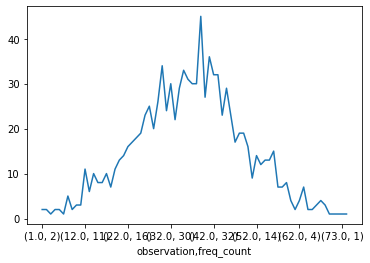

In [154]:
df_population1.plot()

#### 2.- Calculate the exact mean and standard deviation and compare them with your guesses. Do they fall inside the ranges you guessed?

In [160]:
df_population1.mean()

13.88888888888889

In [159]:
df_population1.std()

11.261995864886465

In [ ]:
"""
La desviación típa, se desvía muy poco respecto la media.
"""

#### 3.- Now read the file `ages_population2.csv` . Calculate the frequency distribution and plot it.

In [164]:
df_population_2 = pd.read_csv('../data/ages_population2.csv')
df_population_2.head()

,observation
0,25.0
1,31.0
2,29.0
3,31.0
4,29.0


In [168]:
df_population_2['freq count'] = df_population_2.groupby('observation')['observation'].transform('count')
df_population_2.head()

,observation,freq count
0,25.0,98
1,31.0,61
2,29.0,115
3,31.0,61
4,29.0,115


In [176]:
df_population_21= df_population_2.value_counts(sort=False)

<AxesSubplot:xlabel='observation,freq count'>

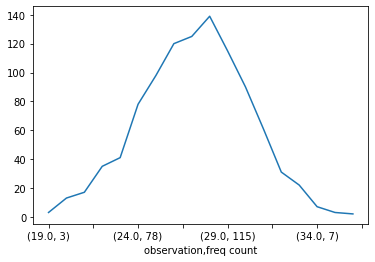

In [177]:
df_population_21.plot()

####  4.- What do you see? Is there any difference with the frequency distribution in step 1?

In [178]:
"""
La primera observación se observa que es disreta mientras que la segunda es continua
"""

'\nLa primera observación se observa que es disreta mientras que la segunda es continua\n'

#### 5.- Calculate the mean and standard deviation. Compare the results with the mean and standard deviation in step 2. What do you think?

In [179]:
df_population_21.mean()

55.55555555555556

In [180]:
df_population_21.std()

48.14466218317485

In [ ]:
"""
Aumenta la media y la desviación porque el tamaño de la muestra es mayor.
Como se observa en la gráfica, el comportamiento es igual en ambas.
"""

## Challenge 5
Now is the turn of `ages_population3.csv`.

#### 1.- Read the file `ages_population3.csv`. Calculate the frequency distribution and plot it.

In [182]:
df_population3= pd.read_csv('../data/ages_population3.csv')
df_population3.head()

,observation
0,21.0
1,21.0
2,24.0
3,31.0
4,54.0


In [185]:
df_population3['freq count'] = df_population3.groupby('observation')['observation'].transform('count')
df_population3.head()

,observation,freq count
0,21.0,14
1,21.0,14
2,24.0,19
3,31.0,21
4,54.0,9


In [190]:
df_population31 = df_population3.value_counts(sort=False)
df_population31

observation  freq count
1.0          1             1
2.0          2             2
4.0          2             2
5.0          1             1
7.0          1             1
                          ..
73.0         6             6
74.0         6             6
75.0         2             2
76.0         1             1
77.0         2             2
Length: 75, dtype: int64

<AxesSubplot:xlabel='observation,freq count'>

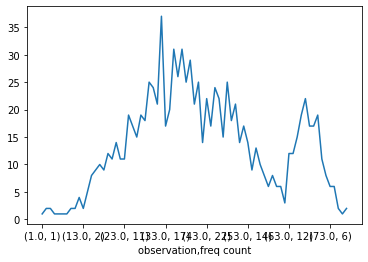

In [191]:
df_population31.plot()

#### 2.- Calculate the mean and standard deviation. Compare the results with the plot in step 1. What is happening?

In [192]:
df_population31.mean()

13.333333333333334

In [193]:
df_population31.std()

8.726061204469291

In [ ]:
"""
your comments here
"""

#### 3.- Calculate the four quartiles. Use the results to explain your reasoning for question in step 2. How much of a difference is there between the median and the mean?

In [194]:
df_population31.describe()

count    75.000000
mean     13.333333
std       8.726061
min       1.000000
25%       6.000000
50%      13.000000
75%      19.000000
max      37.000000
dtype: float64

In [ ]:
"""
your comments here
"""

#### 4.- Calculate other percentiles that might be useful to give more arguments to your reasoning.

In [202]:
np.quantile(df_population31['observation'],[.30,.60,.90])

KeyError: 'observation'

In [ ]:
"""
your comments here
"""

## Bonus challenge
Compare the information about the three neighbourhoods. Prepare a report about the three of them. Remember to find out which are their similarities and their differences backing your arguments in basic statistics.

In [ ]:
# your code here

In [ ]:
"""
your comments here
"""